<a href="https://colab.research.google.com/github/MSCP-CCIA/Laboratorio_1_versionPropia/blob/main/Laboratorio_1_versionPropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import ArrayLike
from collections import Counter
from typing import Dict, List, Tuple
from IPython.display import display
import time

# __Laboratorio 1. Ciencia Computacional Intermedia__

Tenga en cuenta lo siguiente:

*    La actividad puede realizarse en grupos máximo de 4 personas.
*    En cada problema encuentre las probabilidades utilizando la simulación del experimento aleatorio.
*    En todas las simulaciones deben realizarse la gráfica de la serie de tiempo que muestra el cambio de la probabilidad estimada en la medida que se aumentan el número de repeticiones.
*    En los problemas relacionados con probabilidad geométrica deben visualizarse las áreas involucradas.


# __Simulación experimentos aleatorios__


## __1. Dividiendo el grupo__#

Un grupo de 40 estudiantes está conformado por 20 hombres y 20 mujeres. Si se divide el grupo en dos grupos iguales.¿Cuál es la probabilidad de que cada grupo tenga el mismo número de hombres que de mujeres?

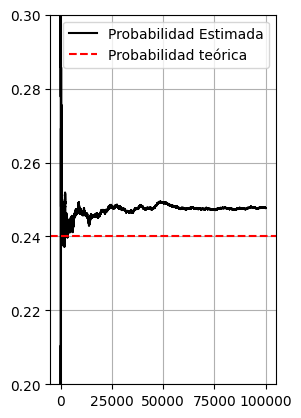

Probabilidad estimada:  0.24773


In [ ]:
def dividing_Group(number_case:int) -> float:
  serie_tiempo = []
  casos_exitosos = []
  casos_fallidos = []
  for _ in range(number_case):
    hombres = np.zeros(20, dtype=int)
    mujeres = np.ones(20, dtype=int)
    grupo = np.split(np.random.permutation(np.concatenate((hombres, mujeres))),2)
    grupoContado, valores=np.unique(grupo[0], return_counts=True)
    if np.all(np.diff(valores) == 0):
      casos_exitosos.append(1)
    else:
      casos_fallidos.append(1)
    serie_tiempo.append(len(casos_exitosos) / ( _ + 1))
  plt.subplot(1, 2, 2)
  plt.ylim(0.2, 0.3)
  plt.plot(range(number_case), serie_tiempo, color='black', label='Probabilidad Estimada')
  plt.axhline(y=0.24, linestyle='--', color='red', label='Probabilidad teórica')
  plt.legend()
  plt.grid()
  plt.show()
  return len(casos_exitosos) / number_case
print("Probabilidad estimada: " , dividing_Group(100000))

## __2. Ecuación cuadrática__#

Los coeficientes $a,b$ y $c$ de la ecuación cuadrática $ax^2+bx+c = 0$ son determinados lanzando un dado corriente tres veces consecutivas. ¿A qué es igual la probabilidad de que las dos raices de la ecuación sean reales?

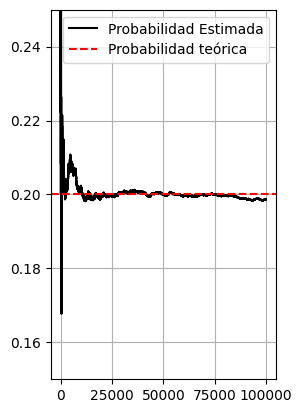

Probabilidad estimada:  0.19863


In [ ]:
def quadratic_Equation(number_case: int) -> float:
  serie_tiempo = []
  casos_exitosos = []
  casos_fallidos = []
  for _ in range(number_case):
    a,b,c = np.random.randint(1, 7, size=3)
    if (((b**2)-(4*a*c))>=0):
      casos_exitosos.append(1)
    else:
      casos_fallidos.append(1)
    serie_tiempo.append(len(casos_exitosos) / ( _ + 1))
  plt.subplot(1, 2, 2)
  plt.ylim(0.15, 0.25)
  plt.plot(range(number_case), serie_tiempo, color='black', label='Probabilidad Estimada')
  plt.axhline(y=0.20, linestyle='--', color='red', label='Probabilidad teórica')
  plt.legend()
  plt.grid()
  plt.show()
  return len(casos_exitosos) / number_case
print("Probabilidad estimada: " , quadratic_Equation(100000))

## __3. La paradoja del cumpleaños__#

¿A que es igual la probabilidad de que entre 25 personas por lo menos dos tengan cumpleaños el mismo día? Suponga que cada año tiene 365 días y que todos los días tienen la misma probabilidad de ser un día de cumpleaños

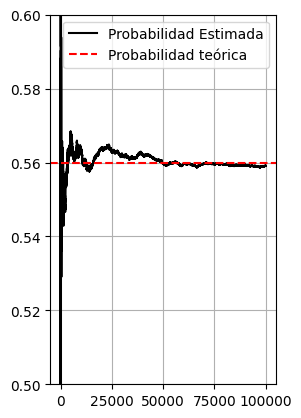

Probabilidad estimada:  0.55913


In [ ]:
def birthday_Paradox(number_case: int) -> float:
  serie_tiempo = []
  casos_exitosos = []
  casos_fallidos = []
  for _ in range(number_case):
    birthdays = np.random.randint(1,366, size=25)
    counts, vals = np.unique(birthdays, return_counts=True)
    if np.isin(2, vals):
      casos_exitosos.append(1)
    else:
      casos_fallidos.append(1)
    serie_tiempo.append(len(casos_exitosos) / ( _ + 1))
  plt.subplot(1, 2, 2)
  plt.ylim(0.5, 0.6)
  plt.plot(range(number_case), serie_tiempo, color='black', label='Probabilidad Estimada')
  plt.axhline(y=0.56, linestyle='--', color='red', label='Probabilidad teórica')
  plt.legend()
  plt.grid()
  plt.show()
  return len(casos_exitosos) / number_case
print("Probabilidad estimada: " , birthday_Paradox(100000))

# __Probabilidad geométrica__

Para caca uno de los siguientes problemas encuentre las probabilidades utilizando un método analítico y mediante simulación. Compare los resultados obtenidos por ambos métodos.

## __4.  Lanzando dardos__

Un dardo se lanza a un tablero circular con un radio de 1 metro. Si sabemos que todos los puntos al interior del círculo tienen la misma probabilidad de recibir el dardo y que el lanzador siempre acierta en algun punto del círulo. Cacule la probabilidad de que el dardo esté más cerca del centro que de la circunferencia círculo.

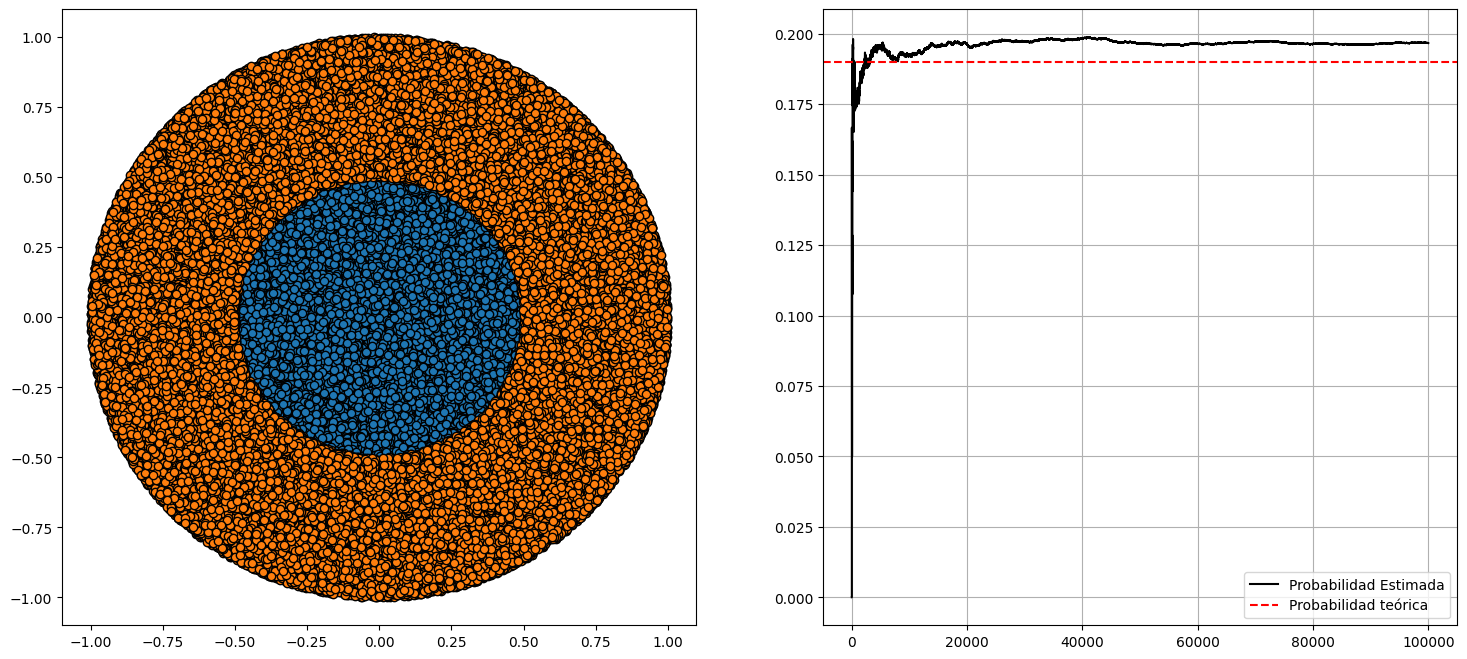

Probabilidad estimada:  0.19673


In [ ]:
def throw_Darts(number_case:int) -> float:
  serie_tiempo = []
  casos_exitosos = []
  casos_fallidos = []
  for _ in range(number_case):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if ((x**2 + y**2)<=0.5**2):
      casos_exitosos.append((x,y))
    elif ((x**2 + y**2)>=0.5**2 and (x**2 + y**2)<=1**2):
      casos_fallidos.append((x,y))
    serie_tiempo.append(len(casos_exitosos) / ( _ + 1))
  plt.figure(figsize=(18, 8))
  plt.subplot(1, 2, 1)
  plt.scatter([x for x, _ in casos_exitosos], [y for _, y in casos_exitosos], edgecolor='black')
  plt.scatter([x for x, _ in casos_fallidos], [y for _, y in casos_fallidos], edgecolor='black')
  plt.subplot(1, 2, 2)
  plt.plot(range(number_case), serie_tiempo, color='black', label='Probabilidad Estimada')
  plt.axhline(y=0.19, linestyle='--', color='red', label='Probabilidad teórica')
  plt.legend()
  plt.grid()
  plt.show()
  return len(casos_exitosos) / number_case
print("Probabilidad estimada: " , throw_Darts(100000))

## __5. Un tronco de madera__

Sobre un tronco de madera completamente recto y con una longitud de 1 metro se seleccionan de manera aleatoria dos puntos $x$ y $y$. Calcular la probabilidad de que $x$ esté más cerca del extremo izquierdo que $y$

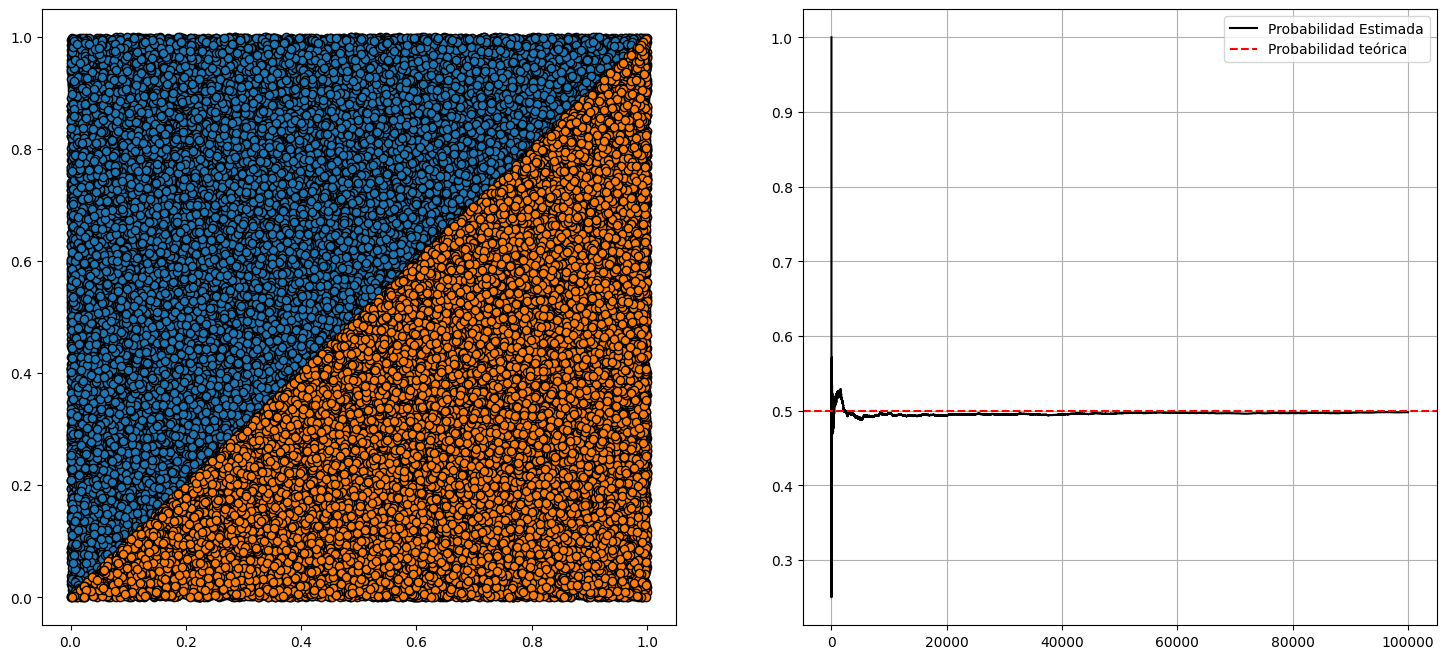

Probabilidad estimada:  0.49777


In [ ]:
def wooden_Log(number_case: int) -> float:
  serie_tiempo = []
  casos_exitosos = []
  casos_fallidos = []
  for _ in range(number_case):
    x = np.random.uniform(0, 1)
    z = np.random.uniform(0, 1)
    y = np.random.uniform(0, 1)
    k = np.random.uniform(0, 1)
    if x<y:
      casos_exitosos.append((x,y))
    else:
      casos_fallidos.append((x,y))
    serie_tiempo.append(len(casos_exitosos) / ( _ + 1))
  plt.figure(figsize=(18, 8))
  plt.subplot(1, 2, 1)
  plt.scatter([x for x, _ in casos_exitosos], [y for _, y in casos_exitosos], edgecolor='black')
  plt.scatter([x for x, _ in casos_fallidos], [y for _, y in casos_fallidos], edgecolor='black')
  plt.subplot(1, 2, 2)
  plt.plot(range(number_case), serie_tiempo, color='black', label='Probabilidad Estimada')
  plt.axhline(y=0.50, linestyle='--', color='red', label='Probabilidad teórica')
  plt.legend()
  plt.grid()
  plt.show()
  return len(casos_exitosos) / number_case
print("Probabilidad estimada: " , wooden_Log(100000))

## __6. Área de un triangulo__

Suponga que se selecciona un punto al azar en el cuadrado $[0,1]×[0,1]$. ¿ A qué es igual la probabilidad de que el punto seleccionado esté en el triangulo acotado por $x=0$, $y=0$ y $x+y=1$?

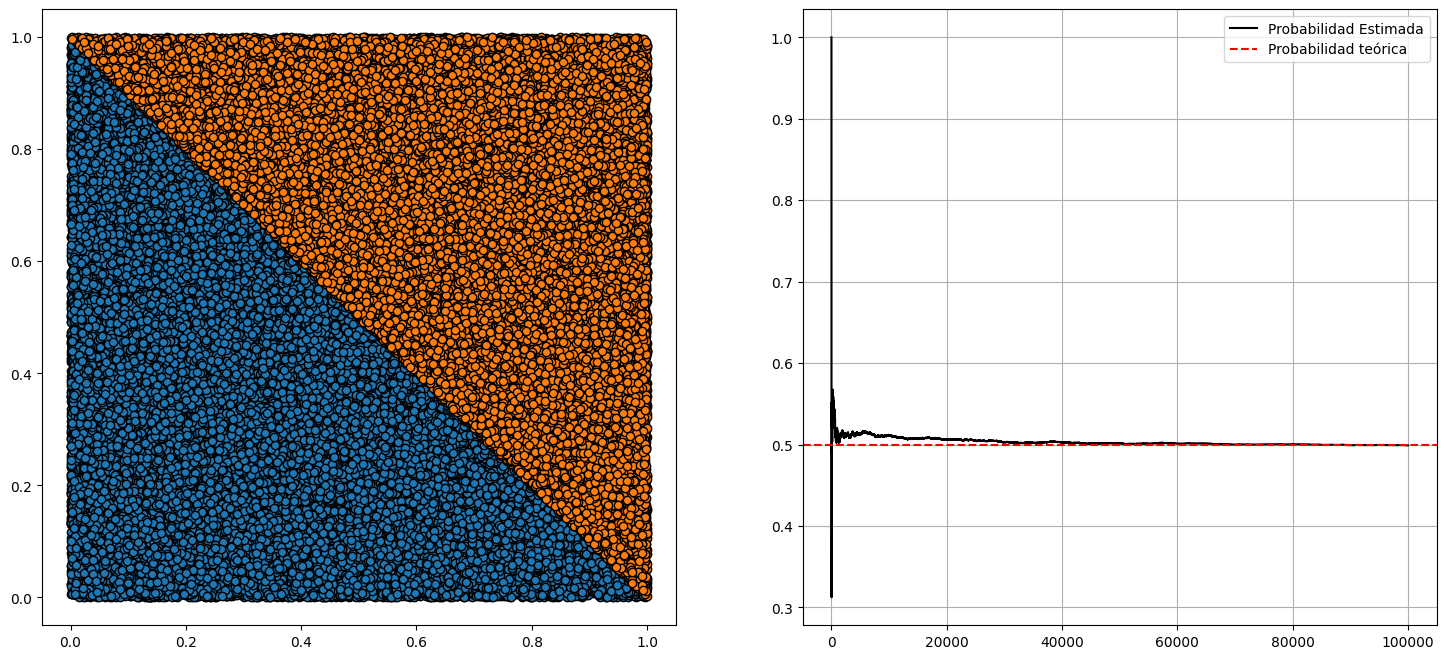

Probabilidad estimada:  0.499


In [ ]:
def triangle_Area(number_case: int) -> float:
  serie_tiempo = []
  casos_exitosos = []
  casos_fallidos = []
  for _ in range(number_case):
    x = np.random.uniform(0, 1)
    y = np.random.uniform(0, 1)
    if (x + y) <= 1:
      casos_exitosos.append((x,y))
    else:
      casos_fallidos.append((x,y))
    serie_tiempo.append(len(casos_exitosos) / ( _ + 1))
  plt.figure(figsize=(18, 8))
  plt.subplot(1, 2, 1)
  plt.scatter([x for x, _ in casos_exitosos], [y for _, y in casos_exitosos], edgecolor='black')
  plt.scatter([x for x, _ in casos_fallidos], [y for _, y in casos_fallidos], edgecolor='black')
  plt.subplot(1, 2, 2)
  plt.plot(range(number_case), serie_tiempo, color='black', label='Probabilidad Estimada')
  plt.axhline(y=0.50, linestyle='--', color='red', label='Probabilidad teórica')
  plt.legend()
  plt.grid()
  plt.show()
  return len(casos_exitosos) / number_case
print("Probabilidad estimada: " , triangle_Area(100000))